# LHAPDF

In [1]:
import sys,os,time
import pandas as pd
import numpy as np
from numba import jit
import numba as nb
from tqdm.notebook import tqdm

from scipy.integrate import quad

#--matplotlib
import matplotlib
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rc('text',usetex=True)
import pylab  as py
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
from scipy.interpolate import interp1d

<ipython-input-1-efba3f212ec5>:10: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
Matplotlib created a temporary config/cache directory at /tmp/matplotlib-tjg2clq7 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
ls /w/jam-sciwork18/apps/lhapdf_tables

ABMP16_3_nlo/                  JAM19PDF_proton_nlo.tar.gz
ABMP16_3_nlo.tar               JAM20PionPDFnlo/
ABMP16_3_nlo.tar.gz            JAM20SIDIS/
ABMP16als116_5_nnlo.tar.gz     JAM20-SIDIS_FF_hadron_nlo/
ATLAS-epWZ16-EIG/              JAM20-SIDIS_FF_kaon_nlo/
ATLAS-epWZ16-EIG.tar           JAM20-SIDIS_FF_pion_nlo/
CJ12max/                       JAM20-SIDIS_PDF_proton_nlo/
CJ12max.tar.gz                 JAM22ffpion/
CJ12mid/                       JAM22pdf/
CJ12mid.tar.gz                 JAM22ppdf/
CJ12min/                       lhapdf.conf
CJ12min.tar.gz                 __MACOSX/
CJ15nlo/                       MAPFF10NLOPIp/
CJ15nlo.tar.gz                 MAPFF10NLOPIp.tar.gz
CSKK_nnlo_EIG/                 MMHT2014nlo68cl/
CSKK_nnlo_EIG.tar              MMHT2014nlo68cl.tar
CSKK_nnlo_EIG.tar.gz           MMHT2014nlo68cl.tar.gz
CT14nlo/                       more/
CT14nlo.tar                    NNFF10_KAp_nlo/
CT14nlo.tar.gz                 NNFF10_KAp_nlo.tar
CT18NLO/                  

In [3]:
import lhapdf
path="/w/jam-sciwork18/apps/lhapdf_tables"
os.environ["LHAPDF_DATA_PATH"] = path
# NNPDF=lhapdf.mkPDFs("NNPDF31_nlo_as_0118")
# NNPDF=lhapdf.mkPDFs("NNPDF40_nlo_as_01180")
# CT=lhapdf.mkPDFs("CT18NLO")
# MMHT=lhapdf.mkPDFs("MMHT2014nlo68cl")
JAM=lhapdf.mkPDFs("JAM22pdf")

In [4]:
CT18=lhapdf.mkPDFs("CT18NLO")

In [5]:
len(JAM)

1057

In [12]:
iflav=2
x=0.1#,0.9
Q2=10.0
values=[CT18[_].xfxQ2(iflav,x,Q2) for _ in range(len(CT18))]
print(np.mean(values))
print(np.std(values))

0.6496622947984266
0.004636525411537439


In [1]:
Q2=10
quad(lambda x: (JAM[0].xfxQ2(2,x,Q2)-JAM[0].xfxQ2(-2,x,Q2))/x, 0,1 )[0]

NameError: name 'quad' is not defined

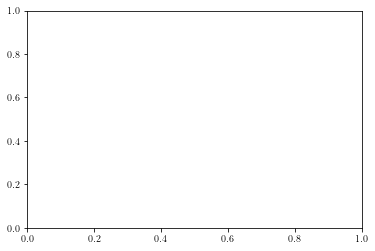

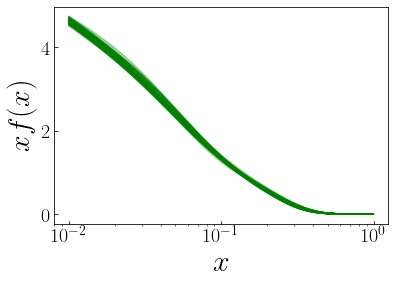

In [30]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*6,nrows*4))
ax=py.subplot(nrows,ncols,1);ax1=ax

x=10**np.linspace(-2,np.log10(0.99))
Q2=10
for iset in range(len(JAM[:100])):
    g =[JAM[iset].xfxQ2(0,_,Q2) for _ in x]
    ax.plot(x,g,'g',alpha=0.3)
ax.semilogx()
ax.set_xlabel(r'$x$',size=30)  
ax.set_ylabel(r'$xf(x)$',size=30) 
ax.tick_params(axis='both', which='major', labelsize=20,direction='in')
py.show()

In [22]:
def integrand(x):
    return (JAM[0].xfxQ2(2,x,10)-JAM[0].xfxQ2(-2,x,10))/x

In [23]:
quad(integrand,0,1)[0]

<ipython-input-23-29ddc645ca99>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(integrand,0,1)[0]


2.000064091387968

In [24]:
@jit(nopython=True)
def f():
    y=0
    for i in range(1000):
        for j in range(1000):
            y+=i*j
    return y

In [25]:
f()

249500250000

In [26]:
#$@jit(nopython=True)
def g():
    y=0
    for i in range(1000):
        for j in range(1000):
            y+=i*j
    return y

In [27]:
%timeit g()

54.8 ms ± 714 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%timeit f()

141 ns ± 1.17 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
